# Cuisine Combination Analysis Project

# Business Problem Statement

To analyze restaurant dataset data in order to identify the most common cuisine combinations and determine whether specific cuisine pairings are associated with higher customer ratings,thereby helping restaurants optimize menu offering and improve customer satisfaction.

# Key Requirements

1)Dataset containing Cuisines and Aggregate Ratings

2)Python tool (Jupyter Notebook / Google Colab)

3)Libraries: pandas, numpy, itertools

4)Data cleaning (remove null values)

5)Split multiple cuisines into combinations

6)Identify most common cuisine pairs

7)Calculate average ratings for each combination

8)Compare popular vs high-rated combos

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset .csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Data Preprocessing

In [7]:
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])

In [8]:
df['Cuisine_List'] = df['Cuisines'].apply(
    lambda x: [c.strip() for c in x.split(',')]
)

In [9]:
combo_counter = Counter()

for cuisines in df['Cuisine_List']:
    if len(cuisines) > 1:
        pairs = combinations(sorted(cuisines), 2)
        combo_counter.update(pairs)

In [10]:
common_combos = combo_counter.most_common(10)

for combo, count in common_combos:
    print(combo, count)

('Chinese', 'North Indian') 1784
('Mughlai', 'North Indian') 832
('Fast Food', 'North Indian') 485
('Continental', 'North Indian') 468
('Chinese', 'Fast Food') 466
('North Indian', 'South Indian') 405
('Chinese', 'Mughlai') 379
('Chinese', 'South Indian') 346
('Chinese', 'Continental') 303
('Italian', 'North Indian') 295


In [11]:
combo_ratings = {}

for cuisines, rating in zip(df['Cuisine_List'], df['Aggregate rating']):
    if len(cuisines) > 1:
        pairs = combinations(sorted(cuisines), 2)
        
        for pair in pairs:
            combo_ratings.setdefault(pair, []).append(rating)

In [12]:
avg_combo_ratings = {
    combo: np.mean(ratings)
    for combo, ratings in combo_ratings.items()
}

In [13]:
top_rated = sorted(
    avg_combo_ratings.items(),
    key=lambda x: x[1],
    reverse=True
)[:10]

for combo, rating in top_rated:
    print(combo, round(rating, 2))

('European', 'Indian') 4.9
('American', 'Caribbean') 4.9
('BBQ', 'Breakfast') 4.9
('American', 'Coffee and Tea') 4.9
('Sandwich', 'Tea') 4.9
('Healthy Food', 'Mexican') 4.9
('Indonesian', 'Sunda') 4.9
('Filipino', 'Mexican') 4.85
('European', 'German') 4.8
('Desserts', 'French') 4.8


# Visualization

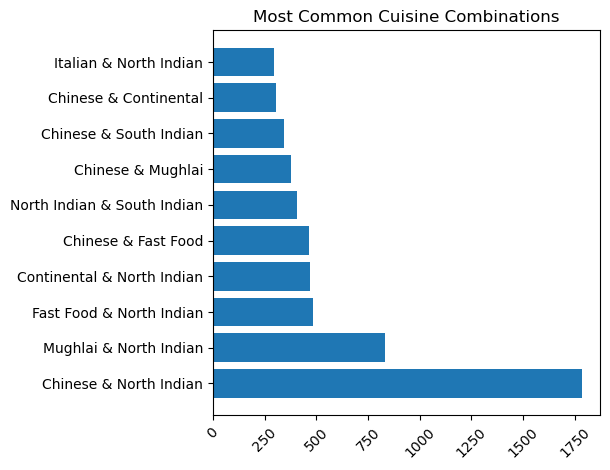

In [15]:
combos = [' & '.join(c) for c, _ in common_combos]
counts = [count for _, count in common_combos]

plt.figure(figsize=(5,5))
plt.barh(combos, counts)
plt.xticks(rotation=45)
plt.title("Most Common Cuisine Combinations")
plt.show()

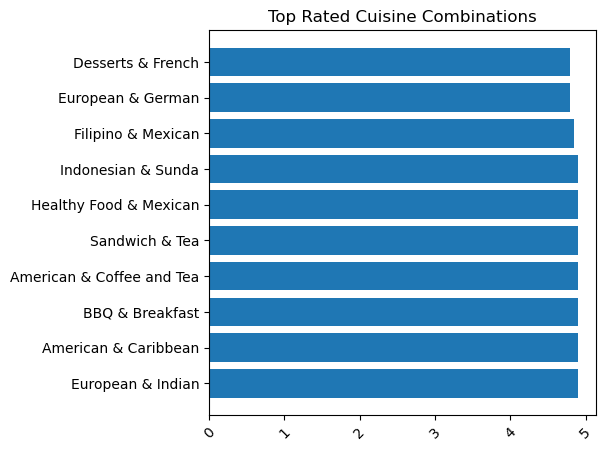

In [17]:
combos = [' & '.join(c) for c, _ in top_rated]
ratings = [rating for _, rating in top_rated]

plt.figure(figsize=(5,5))
plt.barh(combos, ratings)
plt.xticks(rotation=45)
plt.title("Top Rated Cuisine Combinations")
plt.show()

# Report

This project analyzes restaurant data to identify the most common cuisine combinations and examine their impact on customer ratings. The dataset includes cuisines and aggregate ratings of restaurants.

Data preprocessing was performed by removing missing values and splitting multiple cuisines into combinations. Frequency analysis was used to find popular cuisine pairs, and average ratings were calculated for each combination.

The analysis shows that some cuisine combinations are highly popular, while certain premium combinations receive higher ratings. These insights help restaurants optimize menu offerings and improve customer satisfaction.

# Conclusion

The analysis identified the most common cuisine combinations offered by restaurants and evaluated their customer ratings. Results show that popular combinations attract more customers, while certain premium cuisine pairings achieve higher ratings.

This study helps restaurants design better multi-cuisine menus, improve customer satisfaction, and enhance overall business performance.